# **Program to Generate Automatic Reports**

# April 11th 2024

The origin of why I decided to make this program started when I entered my current job. I currently work for a call center in a sales account. We work from home, but my supervisor is very busy doing different tasks along the day while taking care of her child. I performed very well for many months that she provided me with the honor to be a Subject Matter Expert (abbreviated as "SME") for my team. She wanted for me to make some update reports so our team can see their performance in their sales and other metrics. The way she and other SME's were doing these reports takes a considerable amount of time. They received the reports through email, downloaded the two CSV files the report contained, uploaded them on Google Drive and then they copied and pasted all the values they needed in a sheet. I wanted to put in practice the skills I'm currently learning through my Data Analysis path, so I decided to do this program to make our life easier.

I'm using a PC provided by the company, so of course, it has its restrictions, so I decided to use Google Colab to make the program without the need to download an IDE like Jupyter Notebook. I was able to make this program while having some idle time between calls and started to make some changes along the way. Before making the program, I thought on using Pandas and Seaborn, but then I realized that Seaborn was not necessary for this task, so I decided to only keep Pandas.

With the first version of this program, the output only showed the names and the total revenue that each agent generated since I was only using one of the CSV files, but then, one of my colleagues asked about how many sales they have done during that time (the amount of sales we do is part of our paid bonuses). So, I decided to add the feature for the program to read both CSV files that are sent by our higher ups and to merge them into one table. I had some issues trying to hide the indexes of the elements and putting some colors in the program, but in the end, I was able to finish the program in a way I was satisfied with its presentation.

I'm very satisfied with this program. I know it's not perfect and it's not a big project, but I'm happy that I could put in practice my skills for a real world problem. Now we can generate these reports in less than a minute and present them in the team's Google Chat group. This is only the start of what it'll come in the future.  

# Additional Notes

The code in this notebook and the files used are a representation of the program I use in my job. None of these names (except mine), data or files are extracted from my work environment due to privacy purposes.

# Test CSV file links



*   [Most Recent Activity Report](https://drive.google.com/file/d/1Xaq_FQehui1VLlF1LtSAb_t1KCPs6KgC/view?usp=drive_link)
*   [Most Recent Sales Report](https://drive.google.com/file/d/11KvJzUUkqtdRusq271gcUdTP1hDr0UOv/view?usp=drive_link)



# Output

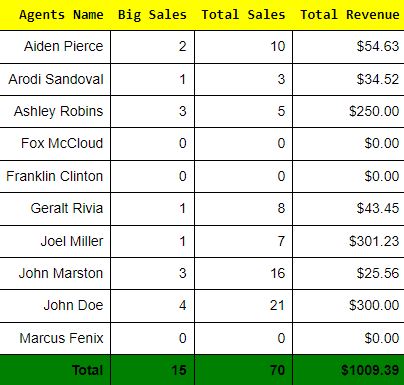

# Code

In [4]:
import pandas as pd

# Reads the first CSV file
df_activity = pd.read_csv('most_recent_activity_report.csv')

# Reads the second CSV file
df_calls_srs = pd.read_csv('most_recent_sales_report.csv')

# Merge the two DataFrames on the "Agent Full Name" column
merged_df = pd.merge(df_activity, df_calls_srs, on='Agent Full Name', how='left')

# List of names that will be used for the report
list_name = ['Arodi Sandoval', 'Jon Do', 'Ashley Robins', 'Jeral Riva', 'Franlin Clinon', 'Joe Milker', 'Aiden Pierce', 'Fox McCloud', 'Marcus Fenix', 'John Marston']

# Filters the merged dataframe to show only the selected names and makes a new dataframe called "filtered_df"
filtered_df = merged_df[merged_df['Agent Full Name'].isin(list_name)]

# Columns that will be used for the report
selected_columns = ['Agent Full Name', 'Big Sales Per Agent', 'Total Sales Per Agent', 'Financial Total Revenue']
filtered_df = filtered_df[selected_columns]

# Renames the columns
filtered_df = filtered_df.rename(columns={'Agent Full Name': 'Agents Name',
                                          'Big Sales Per Agent': "Big Sales",
                                          'Total Sales Per Agent': "Total Sales",
                                          'Financial Total Revenue': 'Total Revenue'})

# Temporarily removes the dollar sign and makes the summatory of the total revenue
filtered_df['Total Revenue'] = pd.to_numeric(filtered_df['Total Revenue'].str.replace('$', ''), errors='coerce')
filtered_df["Big Sales"] = pd.to_numeric(filtered_df["Big Sales"], errors='coerce')
filtered_df["Total Sales"] = pd.to_numeric(filtered_df["Total Sales"], errors='coerce')
total = filtered_df['Total Revenue'].sum()

# Create a DataFrame for the total revenue
total_row = pd.DataFrame({'Agents Name': ['Total'], 'Total Revenue': [total]})

# Calculate the sum of Big Sales and Total Sales
total_big_sales = filtered_df["Big Sales"].sum()
total_sales = filtered_df["Total Sales"].sum()

# Add the sum of XS's and Total Sales to the total row
total_row["Big Sales"] = total_big_sales
total_row["Total Sales"] = total_sales

# Adds the dollar sign again for aesthetic purposes
filtered_df['Total Revenue'] = filtered_df['Total Revenue'].map('${:.2f}'.format)
total_row['Total Revenue'] = total_row['Total Revenue'].map('${:.2f}'.format)

# Concatenate the total revenue row with the filtered_df
filtered_df = pd.concat([filtered_df, total_row])

# Renames some agent names that are incorrect
filtered_df.loc[filtered_df['Agents Name'] == 'Jon Do', 'Agents Name'] = 'John Doe'
filtered_df.loc[filtered_df['Agents Name'] == 'Jeral Riva', 'Agents Name'] = 'Geralt Rivia'
filtered_df.loc[filtered_df['Agents Name'] == 'Franlin Clinon', 'Agents Name'] = 'Franklin Clinton'
filtered_df.loc[filtered_df['Agents Name'] == 'Joe Milker', 'Agents Name'] = 'Joel Miller'

# Define the style for the header
header_style = {
    'selector': 'thead th',
    'props': [
        ('background-color', 'yellow'),
        ('color', 'black'),
        ('font-weight', 'bold'),
    ]
}

# Define the style for elements between the header and the last index
normal_style = {
    'selector': 'tr:not(:last-child)',
    'props': [
        ('background-color', 'white'),
        ('color', 'black'),
        ('font-weight', 'normal'),
    ]
}

# Define the style for the last row
last_row_style = {
    'selector': 'tr:last-child',
    'props': [
        ('background-color', 'green'),
        ('color', 'black'),
        ('font-weight', 'bold'),
    ]
}

# Apply the styles to the DataFrame and set grid properties
styled_df = filtered_df.reset_index(drop=True).style.set_table_styles([header_style, normal_style, last_row_style]).set_properties(**{'border-collapse': 'collapse', 'border': '1px solid black'}).hide()

# Display the styled DataFrame
styled_df


Agents Name,Big Sales,Total Sales,Total Revenue
Aiden Pierce,2,10,$54.63
Arodi Sandoval,1,3,$34.52
Ashley Robins,3,5,$250.00
Fox McCloud,0,0,$0.00
Franklin Clinton,0,0,$0.00
Geralt Rivia,1,8,$43.45
Joel Miller,1,7,$301.23
John Marston,3,16,$25.56
John Doe,4,21,$300.00
Marcus Fenix,0,0,$0.00
